In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from scipy.io import loadmat

from disp import set_font_size

FPS = 2
DT = 1/FPS
NT = 61

COL_START_RSP = 6  # which col of data frame responses start at
ISTART_STIM, ISTOP_STIM = (20, 41)  # time idxs start and end of stim
LOAD_FILE = 'data/simple/pacheco.csv'

In [2]:
df = pd.read_csv(LOAD_FILE)
df

,EXPT_ID,STIM,FLY,NEUROPIL,NEUROPIL_IDX,RESPONSE_TYPE_LABEL,IT0,IT1,IT2,IT3,...,IT51,IT52,IT53,IT54,IT55,IT56,IT57,IT58,IT59,IT60
0,0,S,1,sSADC,0,13,-1.064650,-0.991647,-1.121479,-0.629292,...,0.051085,-0.110480,-0.397804,-0.571073,-0.253161,-0.178974,-0.253286,-0.752629,-0.956365,-0.988533
1,0,P,1,sSADC,0,13,-0.320404,-0.559765,-0.523192,-0.857264,...,-0.691097,-0.449559,-0.457743,-0.512118,-0.287431,-0.309100,-0.569958,-0.905663,-0.689552,-1.064650
2,1,S,1,AMMC,1,13,-0.670883,-0.598723,-0.533291,-0.793913,...,-0.005784,-0.109866,-0.132748,-0.597256,-0.451863,-0.620447,-0.569680,-0.700189,-0.616188,-0.476707
3,1,P,1,AMMC,1,13,-0.744941,-1.096020,-1.057107,-0.811409,...,-0.210221,-0.328872,-0.576546,-0.498928,-0.628736,-0.832286,-0.528669,-0.588112,-0.577622,-0.670883
4,2,S,1,sSADC,0,13,-0.635748,-0.863903,-0.862375,-0.684682,...,-0.608705,-0.415244,-0.465983,-0.616140,-0.812081,-0.932510,-0.772075,-0.831859,-1.007751,-0.918067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38067,19033,P,47,GNG,3,18,-0.773994,-0.749235,-0.769634,-0.770018,...,-0.581494,-0.563422,-0.621782,-0.649898,-0.669798,-0.700001,-0.714815,-0.692207,-0.686311,-0.682736
38068,19034,S,47,sSADC,0,15,-0.419309,-0.535373,-0.702333,-0.963590,...,1.117251,0.243481,0.732199,0.639677,0.828020,0.873257,0.189817,-0.005124,0.224224,0.138849
38069,19034,P,47,sSADC,0,15,-0.052815,-0.259736,-0.696474,-0.727516,...,0.706880,1.258616,0.992831,0.713360,0.680643,0.474997,0.210091,-0.129159,-0.379913,-0.419309
38070,19035,S,47,PLP,7,12,-0.978986,-1.206155,-1.368195,-1.164586,...,-1.015918,-0.829640,-0.580169,-0.611433,-0.154345,0.070995,-0.102384,-0.563238,-0.829081,-1.113682


In [3]:
expt_ids = np.sort(np.unique(df['EXPT_ID']))

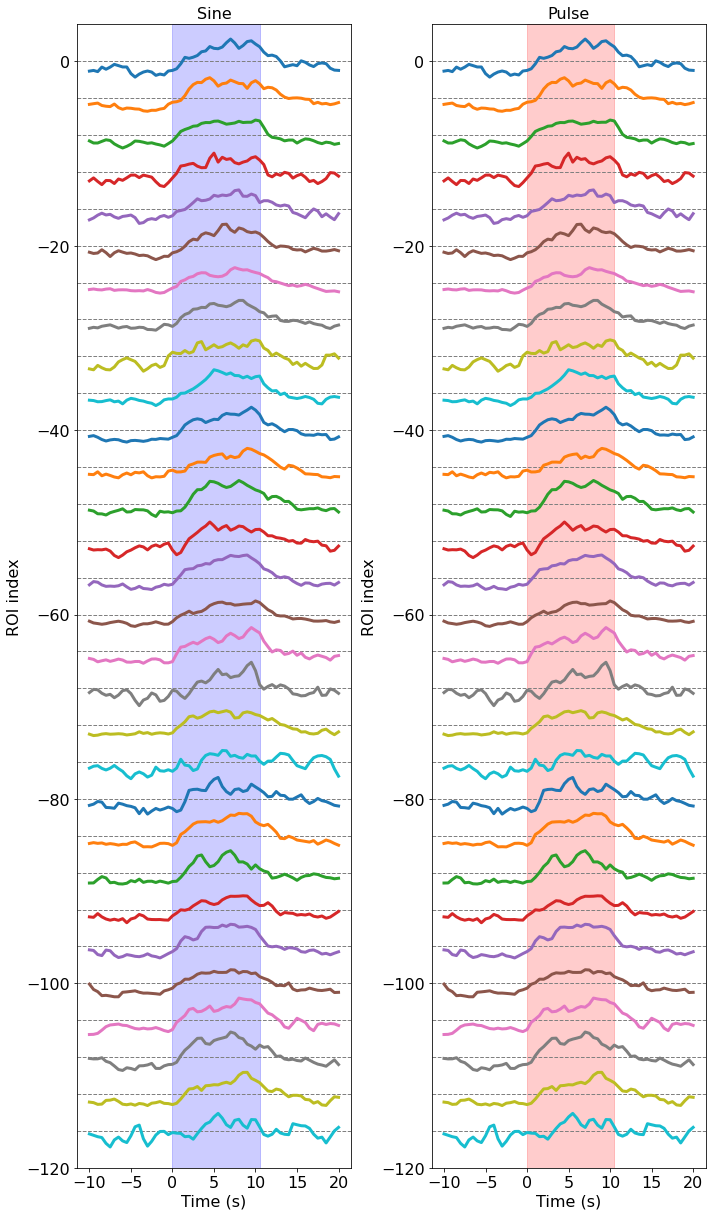

In [4]:
nroi_plot = 30
t = np.arange(NT)*DT - 10

fig, axs = plt.subplots(1, 2, figsize=(10, 17), tight_layout=True)
for cexpt, expt_id in enumerate(expt_ids[:nroi_plot]):
    # sine response
    row_s = df[(df['EXPT_ID'] == expt_id) & (df['STIM'] == 'S')]
    rsp_s = np.array(row_s).flatten()[6:]
    
    axs[0].axhline(-4*cexpt, lw=1, ls='--', c='gray')
    axs[0].plot(t, rsp_s - 4*cexpt, lw=3)
    
    # pulse response
    row_p = df[(df['EXPT_ID'] == expt_id) & (df['STIM'] == 'S')]
    rsp_p = np.array(row_p).flatten()[6:]
    
    axs[1].axhline(-4*cexpt, lw=1, ls='--', c='gray')
    axs[1].plot(t, rsp_p - 4*cexpt, lw=3)
    
for ax, c, stim in zip(axs, ['b', 'r'], ['Sine', 'Pulse']):
    ax.axvspan(t[ISTART_STIM], t[ISTOP_STIM], color=c, alpha=.2)
    ax.set_title(stim)
    ax.set_ylim(-4*nroi_plot, 4)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('ROI index')
    
set_font_size(axs, 16)